# Optimal Cluster representation on Iris dataset

In [1]:
#Importint the required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [2]:
#Loading the Iris dataset
iris_data = pd.read_csv('Iris.csv')

In [3]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#getting only the feature values
x = iris_data.iloc[:,[1,2,3,4]].values

In [5]:
#importing k-means libraries using skicit learn
from sklearn.cluster import KMeans 
wss = list() #within sum of squares list 

#Calculation for plotting the elbow graph to obtain elbow point 
#k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence
#max_iter - Maximum number of iterations of the k-means algorithm for a single run
#n_init - Number of time the k-means algorithm will be run with different centroid seeds. 
#The final results will be the best output of n_init consecutive runs in terms of inertia
for i in range(1,8) :
    kmeans = KMeans (n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wss.append(kmeans.inertia_)#Sum of squared distances of samples to their closest cluster center

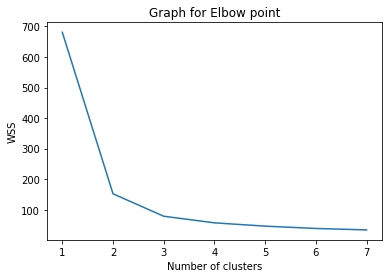

In [6]:
#Plotting Elbow graph to obtain elbow point 
plt.plot(range(1,8),wss)
plt.title('Graph for Elbow point')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

##### From the above graph we choose optimal number of clusters to be 3

In [7]:
#Clustering the Iris dataset into 3 clusters 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

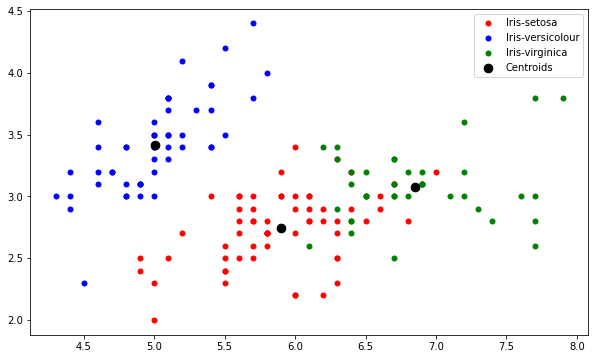

In [8]:
#Plotting the scatter plot for the Iris dataset in form of clusters 
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 25, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 75, c = 'black', label = 'Centroids')
plt.legend(loc =1)